In [1]:
%matplotlib widget 
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import Latex
import scipy.constants as sc
import ht

$\rho V C_p\dfrac{d T}{dt}= -\left(h_{conv}S(T-T_{air}) + h_{rad}S(T_{fs}-T)\right) $

In [33]:
hconv = 5
epsilon = 1
Tfs = 273+1521
T0 = 77
Taire = 273+30
hrad = 4*sc.Stefan_Boltzmann*epsilon*((Tfs+T0)/2)**3
hconv = 5
rho = 2700
Cp = 900
k = 240
S = 25e-4
V = 10e-6
k_acero = 200

In [34]:
sc.Stefan_Boltzmann*epsilon*((Tfs+T0)/2)**3

46.424059281545404

In [35]:
from sympy import Function, dsolve, Derivative, checkodesol
from sympy.abc import t
T = Function('T')
A, B, t = sp.symbols("A B t")
# Solve the ODE
solucion = dsolve(Derivative(T(t), t, t) - A*T(t)-B, T(t))
solucion
# Check that the solution is correct
#checkodesol(Derivative(y(x), x, x) + 9*y(x), result)

Eq(T(t), C1*exp(-sqrt(A)*t) + C2*exp(sqrt(A)*t) - B/A)

In [36]:
A = -(hconv-hrad)*S / (rho*V*Cp)
B = ((hconv*Taire-hrad*Tfs)*S) / (rho*V*Cp)


In [49]:
T = solucion.subs('A',A).subs('B',B).rhs
T = T.subs('C2',0)
C1 = sp.solve(T.subs('t',0)-T0)[0]
T = T.subs('C1',C1)

In [50]:
solucion

Eq(T(t), C1*exp(-sqrt(A)*t) + C2*exp(sqrt(A)*t) - B/A)

In [52]:
hconvi = 5
A = -(hconvi-hrad)*S / (rho*V*Cp)
B = ((hconvi*Taire-hrad*Tfs)*S) / (rho*V*Cp)
T = solucion.subs('A',A).subs('B',B).rhs
T = T.subs('C2',0)
C1 = sp.solve(T.subs('t',0)-T0)[0]
T = T.subs('C1',C1)  
T

1908.94913212973 - 1558.94913212973*exp(-0.0282962227823882*t)

-34.117700556005126
-33.844938210326106
-33.5721758646471
-33.29941351896809
-33.026651173289075


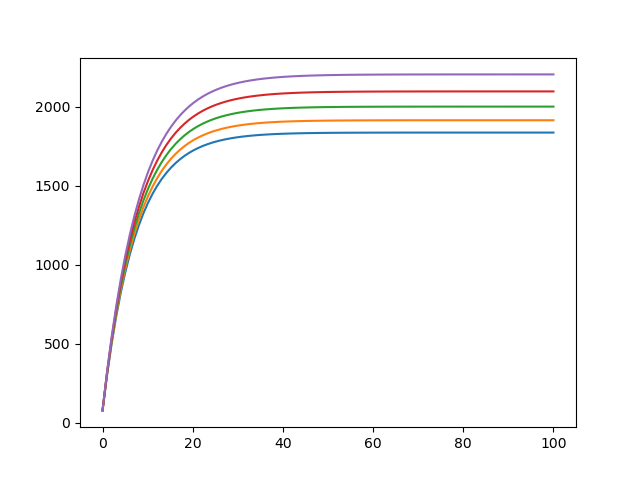

In [39]:
fig,ax = plt.subplots()
ts = np.linspace(0,100,100)
hconvs = np.linspace(5,40,5)
for i,hconvi in enumerate(hconvs):
    A = -(hconvi-hrad)*S / (rho*V*Cp)
    B = ((hconvi*Taire-hrad*Tfs)*S) / (rho*V*Cp)
    T = solucion.subs('A',A).subs('B',B).rhs
    T = T.subs('C2',0)
    C1 = sp.solve(T.subs('t',0)-T0)[0]
    T = T.subs('C1',C1)   
    Tf = np.array([T.subs('t',tsi) for tsi in ts])
    ax.plot(ts,Tf)
    print(B)

In [40]:
hrad,T0

(185.69623712618161, 77)

In [42]:
L = 100e-3
Bi =hrad*L / k_acero
Bi

0.09284811856309082

In [43]:
solucion

Eq(T(t), C1*exp(-sqrt(A)*t) + C2*exp(sqrt(A)*t) - B/A)

In [44]:
A

0.014989324807220329

# Cambia el tamaño

In [45]:
hconv = 5
epsilon = 1
Tfs = 273+1521
T0 = 77+273
Taire = 273+30
hrad = sc.Stefan_Boltzmann*epsilon*((Tfs+T0)/2)**3
hconv = 5
rho = 2700
Cp = 900
k = 240
radio = 10e-2
S = 4*np.pi*radio**2
V = 4/3*np.pi*radio**3
k_acero = 200



In [46]:
from sympy import Function, dsolve, Derivative, checkodesol
from sympy.abc import t
T = Function('T')
A, B, t = sp.symbols("A B t")
# Solve the ODE
solucion = dsolve(Derivative(T(t), t, t) - A*T(t)-B, T(t))
solucion
# Check that the solution is correct
#checkodesol(Derivative(y(x), x, x) + 9*y(x), result)

Eq(T(t), C1*exp(-sqrt(A)*t) + C2*exp(sqrt(A)*t) - B/A)

In [47]:
T = solucion.subs('A',A).subs('B',B).rhs
T = T.subs('C2',0)
C1 = sp.solve(T.subs('t',0)-T0)[0]
T = T.subs('C1',C1)

/home/juan/anaconda3/lib/python3.10/site-packages/sympy/core/basic.py:1088: SymPyDeprecationWarning: 

Using non-Expr arguments in Mul is deprecated (in this case, one of
the arguments has type 'Dict').

If you really did intend to use a multiplication or addition operation with
this object, use the * or + operator instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#non-expr-args-deprecated
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  rv = self.func(*args)


-1.5284501824455186
-1.495718700964037
-1.4629872194825555
-1.430255738001074
-1.3975242565195927


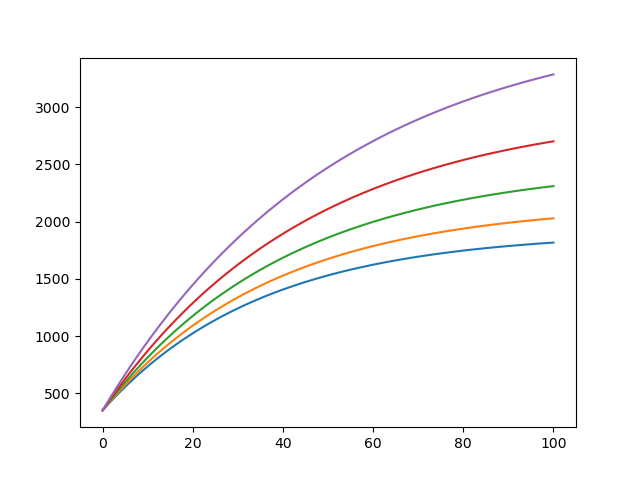

In [48]:
fig,ax = plt.subplots()
ts = np.linspace(0,100,100)
hconvs = np.linspace(5,40,5)
for i,hconvi in enumerate(hconvs):
    A = -(hconvi-hrad)*S / (rho*V*Cp)
    B = ((hconvi*Taire-hrad*Tfs)*S) / (rho*V*Cp)
    T = solucion.subs('A',A).subs('B',B).rhs
    T = T.subs('C2',0)
    C1 = sp.solve(T.subs('t',0)-T0)[0]
    T = T.subs('C1',C1)   
    Tf = np.array([T.subs('t',tsi) for tsi in ts])
    ax.plot(ts,Tf)
    print(B)

In [17]:
Bi = hrad*radio/k_acero
Bi

0.03492738706189716

In [18]:
import pyromat as pm

In [19]:
pm.search(contains='ate')

set()

In [20]:
Al = pm.get('ig.Al')

In [21]:
Al.cp(300)
Al.d(T=300)

array([1.09604379])

In [22]:
pm.config

     config_file : ['/home/juan/anaconda3/lib/python3.10/site-package...
  config_verbose : False
         dat_dir : ['/home/juan/anaconda3/lib/python3.10/site-package...
 dat_exist_fatal : False
   dat_overwrite : True
   dat_recursive : True
     dat_verbose : False
           def_T : 298.15
         def_oob : nan
           def_p : 1.01325
   error_verbose : True
     install_dir : '/home/juan/anaconda3/lib/python3.10/site-packages...
         reg_dir : ['/home/juan/anaconda3/lib/python3.10/site-package...
 reg_exist_fatal : False
   reg_overwrite : True
     reg_verbose : False
     unit_energy : 'kJ'
      unit_force : 'N'
     unit_length : 'm'
       unit_mass : 'kg'
     unit_matter : 'kg'
      unit_molar : 'kmol'
   unit_pressure : 'bar'
unit_temperature : 'K'
       unit_time : 's'
     unit_volume : 'm3'
         version : '2.2.4'
 warning_verbose : True

In [23]:
pm.search(name='aluminium')

{<ig, ig.AlHO2>,
 <ig2, ig.Al>,
 <ig2, ig.AlBr3>,
 <ig2, ig.AlCl3>,
 <ig2, ig.AlClO>,
 <ig2, ig.AlF3>,
 <ig2, ig.AlFO>,
 <ig2, ig.AlI3>,
 <ig2, ig.AlN>}

In [24]:
Al.data

{'C': [[3.11112433,
   -0.0035938231,
   8.14749313e-06,
   -8.08808966e-09,
   2.93132463e-12,
   38828.339,
   2.84045724],
  [2.53385701,
   -4.65859492e-05,
   2.82798048e-08,
   -8.54362013e-12,
   1.02207983e-15,
   38904.5662,
   5.37984173]],
 'Tlim': [200.0, 1000.0, 6000.0],
 'Tref': 298.15,
 'atoms': {'Al': 1},
 'class': 'ig2',
 'doc': 'The supporting data for this object were adapted from:\nB. McBride, S. Gordon, M. Reno, "Coefficients for Calculating \nThermodynamic and Transport Properties of Individual Species," NASA \nTechnical Memorandum 4513, 1993.\n',
 'ho': 39653.5695,
 'id': 'ig.Al',
 'mw': 26.98154,
 'names': ['Aluminum', 'Aluminium'],
 'pref': 100000.0,
 'inchi': 'InChI=1S/Al',
 'cas': '7429-90-5',
 'fromfile': '/home/juan/anaconda3/lib/python3.10/site-packages/pyromat/data/ig2/Al.hpd'}

In [25]:
Al.h(300)

array([12220.8623064])

In [53]:
(1783+77)/2

930.0